In [1]:
import pandas as pd
import numpy as np
import re
import os
#import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.express as px
#from plotly.subplots import make_subplots
#import plotly.graph_objects as go

import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [2]:
#from xgboost import XGBRegressor, XGBRFRegressor
#from catboost import CatBoostRegressor
#import catboost
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
#from sklearn.preprocessing import StandardScaler, OneHotEncoder
#from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor

#from scipy.stats.mstats import winsorize

#from pyod.models.feature_bagging import FeatureBagging
#from pyod.models.lof import LOF

In [3]:
#CSV to Load
zillow_data= 'zillow_df2.csv'
zillow_df=pd.read_csv(zillow_data)
# Rename Date column from "Unnamed:0 to Date"
zillow_df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
#Set Date Column as Index
zillow_df.set_index('Date', inplace=True)
zillow_df.head(100)

,87120,87121,87124,87109,87108,87110,87144,87106,87102,18103,...,22044,22181,20166,20036,67203,27103,27104,27012,27101,1604
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,791.0,1010.0,943.0,856.0,500.0,1173.0,1215.0,796.0,627.00,999.99,...,999.99,999.99,1781.00,999.99,654.00,996.0,999.99,999.99,999.99,1090.0
2014-02-01,823.0,989.0,913.0,893.0,544.0,1152.0,1195.0,845.0,688.00,901.00,...,1424.00,2304.00,999.99,999.99,611.00,1050.0,940.00,1093.00,1064.00,1087.0
2014-03-01,808.0,966.0,916.0,882.0,531.0,1170.0,1198.0,835.0,999.99,850.00,...,999.99,2182.00,1832.00,2232.00,999.99,1037.0,940.00,999.99,1030.00,1096.0
2014-04-01,821.0,985.0,931.0,878.0,534.0,1172.0,1195.0,859.0,660.00,858.00,...,1431.00,2129.00,1815.00,999.99,999.99,1036.0,966.00,1095.00,1035.00,1089.0
2014-05-01,832.0,996.0,948.0,871.0,523.0,1179.0,1209.0,880.0,676.00,999.99,...,1420.00,2103.00,1819.00,2164.00,707.00,1052.0,982.00,999.99,1050.00,1098.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-01,1068.0,1300.0,1242.0,1140.0,735.0,1482.0,1557.0,1216.0,810.00,1368.00,...,1556.00,2304.00,1969.00,2089.00,846.00,1399.0,1259.00,1456.00,1444.00,1680.0
2021-04-01,1093.0,1300.0,1260.0,1164.0,763.0,1508.0,1583.0,1242.0,844.00,1421.00,...,1557.00,2329.00,2007.00,2111.00,854.00,1433.0,1345.00,1455.00,1469.00,1671.0
2021-05-01,1111.0,1320.0,1294.0,1184.0,771.0,1543.0,1616.0,1250.0,962.00,1425.00,...,1576.00,2350.00,2011.00,2099.00,836.00,1441.0,1350.00,1449.00,1507.00,1723.0


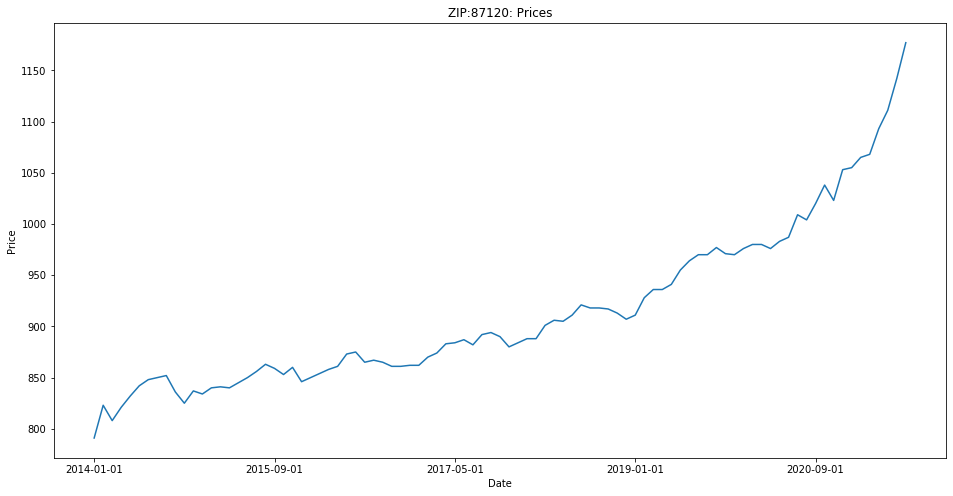

In [49]:
plt.figure(figsize=(16, 8)) # resizing the plot
zillow_df['87120'].plot()
plt.title('ZIP:87120: Prices') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Price') # y label
plt.show()

In [10]:
zillow_df.mean(axis='columns')

Date
2014-01-01    1377.012472
2014-02-01    1331.091661
2014-03-01    1307.963153
2014-04-01    1380.098092
2014-05-01    1417.820761
                 ...     
2021-03-01    1834.253153
2021-04-01    1859.524174
2021-05-01    1892.358916
2021-06-01    1922.614738
2021-07-01    1974.358150
Length: 91, dtype: float64

In [16]:
zillow_df3 = zillow_df.mean(axis='columns')

In [17]:
print (zillow_df3)

Date
2014-01-01    1377.012472
2014-02-01    1331.091661
2014-03-01    1307.963153
2014-04-01    1380.098092
2014-05-01    1417.820761
                 ...     
2021-03-01    1834.253153
2021-04-01    1859.524174
2021-05-01    1892.358916
2021-06-01    1922.614738
2021-07-01    1974.358150
Length: 91, dtype: float64


In [42]:
# AVG of ALL zip code rental prices displayed in time

# Plotly Express
import plotly.express as px

fig = px.line(zillow_df3, x=zillow_df3.index, y=[0], title='Rental Prices Over Time')
fig.show()

In [ ]:
#Use 